<a href="https://colab.research.google.com/github/JangAyeon/ToBigs/blob/master/%ED%80%80%ED%8A%B8%EC%A0%84%EB%9E%B5%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C%EC%84%B8%EC%9B%8C%EB%9D%BC_%EB%B0%95%EC%A4%80%EA%B7%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# 재무 데이터 전처리 함수

def get_finance_data(path):
  data_path=path
  #칼럼으로 만들 두 줄 가져오기
  raw_data=pd.read_excel(data_path,index_col=0)
  big_col=list(raw_data.columns)
  small_col=list(raw_data.iloc[0])


  #big_col 리스트 개선
  new_big_col=[]
  for num,col in enumerate(big_col):
    if 'Unnamed' in col:
      new_big_col.append(new_big_col[num-1])
    else:
      new_big_col.append(big_col[num])
  
  #이중 칼럼 새로 세팅
  raw_data.columns=[new_big_col,small_col]
  clean_df=raw_data.loc[raw_data.index.dropna()]

  return clean_df



In [13]:
fs_path=r'/content/재무제표데이터.xlsx'
fs_df=get_finance_data(fs_path)


fr_path=r'/content/재무비율데이터.xlsx'
fr_df=get_finance_data(fr_path)


invest_path=r'/content/투자지표데이터.xlsx'
invest_df=get_finance_data(invest_path)


In [14]:
fs_df.head()

2011/12                              ... 2018/12                            
          당기순이익  매출액   부채 영업이익 영업활동으로인한현금흐름  ...      부채 영업이익 영업활동으로인한현금흐름   자본   자산
A060310     NaN  NaN  NaN  NaN          NaN  ...     242   -2            2  322  564
A095570     NaN  NaN  NaN  NaN          NaN  ...     NaN  NaN          NaN  NaN  NaN
A068400     NaN  NaN  NaN  NaN          NaN  ...     NaN  NaN          NaN  NaN  NaN
A006840     NaN  NaN  NaN  NaN          NaN  ...     NaN  NaN          NaN  NaN  NaN
A054620     NaN  NaN  NaN  NaN          NaN  ...     NaN  NaN          NaN  NaN  NaN

[5 rows x 266 columns]

In [15]:
fr_df.head()

2010/12                       ... 2018/12                        
            ROA ROIC 부채비율 영업이익률 유동비율  ...     ROA  ROIC  부채비율 영업이익률  유동비율
A060310     NaN  NaN  NaN   NaN  NaN  ...    -1.1  -0.9  75.3  -0.8  92.8
A095570     NaN  NaN  NaN   NaN  NaN  ...     NaN   NaN   NaN   NaN   NaN
A068400     NaN  NaN  NaN   NaN  NaN  ...     NaN   NaN   NaN   NaN   NaN
A006840     NaN  NaN  NaN   NaN  NaN  ...     NaN   NaN   NaN   NaN   NaN
A054620     NaN  NaN  NaN   NaN  NaN  ...     NaN   NaN   NaN   NaN   NaN

[5 rows x 210 columns]

In [16]:
invest_df.head()

2010/12                      2011/02  ... 2018/11 2018/12                     
            PBR  PCR  PER  PSR 총현금흐름     PBR  ...   총현금흐름     PBR  PCR  PER  PSR 총현금흐름
A060310     NaN  NaN  NaN  NaN   NaN     NaN  ...     NaN    3.06  NaN  NaN  NaN    12
A095570     NaN  NaN  NaN  NaN   NaN     NaN  ...     NaN     NaN  NaN  NaN  NaN   NaN
A068400     NaN  NaN  NaN  NaN   NaN     NaN  ...     NaN     NaN  NaN  NaN  NaN   NaN
A006840     NaN  NaN  NaN  NaN   NaN     NaN  ...     NaN     NaN  NaN  NaN  NaN   NaN
A054620     NaN  NaN  NaN  NaN   NaN     NaN  ...     NaN     NaN  NaN  NaN  NaN   NaN

[5 rows x 230 columns]

#**PER**
PER 낮을 수록 해당 주식 저평가됨 -> 선호<br>
PER 기준으로 오름 차순으로 정렬하는 함수

In [17]:
'''
#2014.12 기준으로 PER 낮은 순으로 나열
invest_df[('2014/12','PER')]=pd.to_numeric(invest_df[('2014/12','PER')])
per_sorted=invest_df.sort_values(by=('2014/12','PER'))

per_sorted['2014/12'] #특정 날짜만 확인해 정렬된 것 확인
'''

def low_per(invest_df,index_date,num):
  invest_df[(index_date,'PER')]=pd.to_numeric(invest_df[(index_date,'PER')])
  per_sorted=invest_df.sort_values(by=(index_date,'PER'))
  return per_sorted[index_date][:num]

#**ROA**
ROA 높을 수록 ????? -> 선호

In [18]:

def check_IFRS(x):
  if x=='N/A(IFRS)':
    return np.NaN
  else:
    return x

#ROA 기준으로 내름차순으로 정렬하는 함수
def high_roa(fr_df,index_date,num):
  fr_df[(index_date,'ROA')]=fr_df[(index_date,'ROA')].apply(check_IFRS)
  fr_df[(index_date,'ROA')]=pd.to_numeric(fr_df[(index_date,'ROA')])
  sorted_roa=fr_df.sort_values(by=(index_date,'ROA'),ascending=False)
  return sorted_roa[index_date][:num]

#**FER + ROA**

In [19]:
date='2015/12'
per=low_per(invest_df,date,None)
roa=high_roa(fr_df,date,None)

'''
범위에 None = 범위가 없는 것 = 전체 데이터 다 가져옴
-> 상대 순위 만들어 그 순위 합산해 큰 ROA와 작은 FER 동시에 만족하는 종목 선택
-> rank() 이용

per['per순위']=per['PER'].rank() #PER 순위 만들기
per
roa['roa순위']=roa['ROA'].rank(ascending=False) #ROA 순위 만들기
roa
#PER,ROA 합산해 순위 만들기
(per['per순위']+roa['roa순위']).sort_values() #합산 등수임
(per['per순위']+roa['roa순위']).rank().sort_values() #상대 등수임
'''

#저PER , 고ROA  합산 순위 만드는 함수

def PER_ROA(fr_df,invest_df,index_date,num):
  per=low_per(invest_df,index_date,None)
  roa=high_roa(fr_df,index_date,None)
  per['per순위']=per['PER'].rank()
  roa['roa순위']=roa['ROA'].rank(ascending=False)
  per_roa=pd.merge(per,roa,how='outer',left_index=True,right_index=True)
  per_roa['per_roa_rank']=(per_roa['per순위']+per_roa['roa순위']).rank().sort_values()
  per_roa=per_roa.sort_values(by='per_roa_rank')
  return per_roa[:num]


In [20]:
PER_ROA(fr_df,invest_df,'2017/12',10)

,PBR,PCR,PER,PSR,총현금흐름,per순위,ROA,ROIC,부채비율,영업이익률,유동비율,roa순위,per_roa_rank
A027410,0.69,0.2,0.20,5.75,1283,3.0,252.0,17.1,18.3,8.4,492.2,1.0,1.5
A054620,0.52,0.18,0.18,1.35,49,2.0,168.0,0.2,26.5,0.3,388.9,2.0,1.5
A071970,0.76,0.13,0.14,0.4,395,1.0,92.3,86.2,411.4,12.0,70.8,4.0,3.0
A002620,0.91,0.6,0.61,7.09,40,4.0,150.6,0.3,15.9,0.7,250.7,3.0,4.0
A088390,0.76,0.61,0.64,2.47,-47,5.0,58.4,-9.9,41.7,-33.3,175.2,7.0,5.0
A011810,12.96,1.37,1.38,0.26,471,12.0,50.1,15.0,1374.5,2.4,85.9,10.0,6.0
A078070,0.61,1.19,1.21,15.06,28,11.0,47.0,3.6,3.4,20.2,2614.9,12.0,7.0
A001800,0.9,0.72,0.76,9.98,919,6.0,41.2,0.2,38.0,4.4,118.7,18.0,8.0
A192400,1.67,2.46,2.69,2.67,884,20.0,75.1,29.3,36.8,14.4,202.4,6.0,9.0
A148780,1.52,2.51,2.66,0.5,37,19.0,45.8,184.3,61.2,18.6,226.4,14.0,10.0


#**저평가 지수**

In [21]:
#저평가 지수 조합해서 그거 기준으로 정렬해 순위 만들기
'''
<저평가 지표>
PER : 순이익 대비 주가의 저평가 정도를 나타내는 정도
PBR : 순자산 대비 주가의 저평가 정도 
PSR : 주가를 주당 매출액으로 나눈 것으로 기업의 성장성에 주안점을 두고 상대적으로 저평가된 주식을 발굴하는 데 이용하는 성장성 투자지표
PCE : Personal Consumption Expenditures Price
'''

def get_value_rank(invest_df,value_type,index_date,num): #저평가 지수 기준으로 정렬해 순위 구현
  invest_df[(index_date,value_type)]=pd.to_numeric(invest_df[(index_date,value_type)])
  value_sorted=invest_df.sort_values(by=(index_date,value_type))[index_date]
  value_sorted[value_type+'순위']=value_sorted[value_type].rank()

  return value_sorted[[value_type,value_type+'순위']][:num]

def make_value_combo(value_list,invest_df,index_date,num): #저평가 지표 조합 함수
  for i,value in enumerate(value_list):
    temp_df=get_value_rank(invest_df,value,index_date,None)
    if i==0:
      value_combo_df=temp_df
      rank_combo=temp_df[value + '순위']
    else:
      value_combo_df=pd.merge(value_combo_df,temp_df,how='outer',left_index=True,right_index=True)
      rank_combo=rank_combo+temp_df[value+'순위']

  value_combo_df['종합순위']=rank_combo.rank()
  value_combo_df=value_combo_df.sort_values(by='종합순위')

  return value_combo_df[:num]

In [22]:
make_value_combo(['PER','PBR'],invest_df,'2015/12',20) #저PER, 저PBR 주식 찾기 

,PER,PER순위,PBR,PBR순위,종합순위
A101000,1.30,6.0,0.19,3.0,1.0
A019010,1.34,7.0,0.25,7.5,2.0
A037030,1.64,8.0,0.40,53.5,3.0
A058650,4.52,37.0,0.34,28.0,4.0
A138930,4.44,35.0,0.38,47.0,5.0
A001940,5.27,61.0,0.33,23.0,6.0
A042420,2.14,11.0,0.44,80.0,7.0
A031510,3.99,25.0,0.43,72.0,8.0
A030210,5.10,53.5,0.38,47.0,9.0
A002690,5.37,66.5,0.36,36.5,10.5


In [23]:
make_value_combo(['PER','PBR','PSR','PCR'],invest_df,'2015/12',20) #저PER, 저PBR, 저PSR, 저PCR 주식 찾기 

,PER,PER순위,PBR,PBR순위,PSR,PSR순위,PCR,PCR순위,종합순위
A101000,1.30,6.0,0.19,3.0,0.06,14.0,0.92,5.0,1.0
A037030,1.64,8.0,0.40,53.5,0.06,14.0,1.23,12.0,2.0
A058650,4.52,37.0,0.34,28.0,0.13,61.5,1.75,20.5,3.0
A013580,5.67,83.5,0.32,19.5,0.06,14.0,3.48,92.5,4.0
A003030,6.01,101.0,0.23,4.5,0.13,61.5,2.88,62.0,5.0
A010100,7.24,154.0,0.40,53.5,0.08,25.5,2.11,39.0,6.0
A001940,5.27,61.0,0.33,23.0,0.21,151.5,2.91,63.0,7.0
A023800,7.20,152.0,0.42,65.5,0.13,61.5,2.54,49.0,8.5
A024880,5.32,62.0,0.46,99.5,0.18,116.5,2.59,50.0,8.5
A031510,3.99,25.0,0.43,72.0,0.26,211.5,2.05,37.0,10.0


In [24]:
fs_df

2011/12                              ... 2018/12                            
          당기순이익  매출액   부채 영업이익 영업활동으로인한현금흐름  ...      부채 영업이익 영업활동으로인한현금흐름   자본   자산
A060310     NaN  NaN  NaN  NaN          NaN  ...     242   -2            2  322  564
A095570     NaN  NaN  NaN  NaN          NaN  ...     NaN  NaN          NaN  NaN  NaN
A068400     NaN  NaN  NaN  NaN          NaN  ...     NaN  NaN          NaN  NaN  NaN
A006840     NaN  NaN  NaN  NaN          NaN  ...     NaN  NaN          NaN  NaN  NaN
A054620     NaN  NaN  NaN  NaN          NaN  ...     NaN  NaN          NaN  NaN  NaN
...         ...  ...  ...  ...          ...  ...     ...  ...          ...  ...  ...
A189980     NaN  NaN  NaN  NaN          NaN  ...     NaN  NaN          NaN  NaN  NaN
A000540     NaN  NaN  NaN  NaN          NaN  ...     NaN  NaN          NaN  NaN  NaN
A003280     NaN  NaN  NaN  NaN          NaN  ...     NaN  NaN          NaN  NaN  NaN
A037440     NaN  NaN  NaN  NaN          NaN  ...     NaN  NaN          NaN  NaN  NaN
A238490     NaN  NaN  NaN  NaN          NaN  ...     NaN  NaN          NaN  NaN  NaN

[2259 rows x 266 columns]

#**F-Score**
우량 기업 주식 찾기 : 조건 만족시 1점 부여, 조건 불충족시 0점 부여
여러 조건 중 해당 함수에서 따질 조건 : 
1. 당기순이익이 0 이상인가?
2. 영업현금흐름이 0 이상인가?
3. 영업현금흐름이 순이익보다 높은가?

In [25]:


'''
<당기순이익 체크>
date='2015/12'
fscore_df=fs_df[date]
fs_df[date]['당기순이익']>0 
#당기순이익>0면 True, 0보다 작으면 False
#파이썬 연산에서 True, False 알아서 각각 1과 0으로 계산
fscore_df['영업활동점수']=fscore_df['영업활동으로인한현금흐름']>0
fscore_df['더큰영업활동점수']=fscore_df['영업활동으로인한현금흐름']>fscore_df['당기순이익']
fscore_df[['당기순이익점수','영업활동점수','더큰영업활동점수']].sum(axis=1)



'''

#F-score 함수
def get_fscore(fs_df,index_date,num):
  fscore_df=fs_df[index_date]
  fscore_df['당기순이익점수']=fscore_df['당기순이익']>0
  fscore_df['영업활동점수']=fscore_df['영업활동으로인한현금흐름']>0
  fscore_df['더큰영업활동점수']=fscore_df['영업활동으로인한현금흐름']>fscore_df['당기순이익']
  fscore_df['종합점수']=fscore_df[['당기순이익점수','영업활동점수','더큰영업활동점수']].sum(axis=1)
  fscore_df=fscore_df[fscore_df['종합점수']==3]

  return fscore_df[:num]



In [26]:
get_fscore(fs_df,'2015/12',20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,당기순이익,매출액,부채,영업이익,영업활동으로인한현금흐름,자본,자산,당기순이익점수,영업활동점수,더큰영업활동점수,종합점수
A027410,1528,43343,8479,1836,3593,7737,16216,True,True,True,3
A138930,5305,NaN,840889,6962,7464,61907,902795,True,True,True,3
A001460,132,1822,3133,211,281,3781,6915,True,True,True,3
A001040,5511,211667,136987,12253,22956,98635,235621,True,True,True,3
A079160,522,11935,9724,669,1517,4452,14176,True,True,True,3
A035760,1120,23086,16381,2097,4404,13501,29882,True,True,True,3
A000120,490,50558,21288,1866,1719,23717,45005,True,True,True,3
A011150,26,1617,436,56,312,500,936,True,True,True,3
A097950,2537,129245,83660,7514,11546,53852,137513,True,True,True,3
A037560,597,11826,10491,1050,3682,9512,20003,True,True,True,3


#**모멘텀**
* 추세추종 전략 : 최근 기간의 가격 추세가 일정 시간 지속 될 것이라고 가정, 가격(수익률)이 상승한 주식을 사고 반대로 하락한 주식을 파는 전략<br>
* 구현 : 최근 n개월의 수익률을 계산하여 이를 종목끼리 서로 비교<br>
* 데이터 : 가격 데이터

In [27]:
#가격 데이터 읽어오기
price_path=r'/content/가격데이터.xlsx'
price_df=pd.read_excel(price_path,index_col=0)
price_df

,060310,095570,068400,006840,054620,265520,211270,027410,282330,138930,001460,001040,079160,035760,000120,011150,097950,051500,037560,058820,023460,065770,083660,000590,012030,306620,016610,005830,000990,139130,068790,004840,241520,155660,069730,017940,245620,037370,079190,007700,...,133820,061250,134780,010660,000850,123260,016580,032560,004800,094280,097870,298040,298050,298020,298000,093370,050090,081660,290270,005870,284420,205470,115160,028080,200670,212310,079980,065510,005010,243070,084110,145020,069260,024060,010240,189980,000540,003280,037440,238490
2013-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-20,2305.0,5050.0,11700.0,55100.0,4955.0,29450.0,6640.0,8430.0,205500.0,7270.0,240500.0,126000.0,44650.0,226600.0,181000.0,2480.0,335000.0,33350.0,9780.0,4875.0,1550.0,2425.0,4170.0,66100.0,888.0,2020.0,4830.0,73100.0,12900.0,8740.0,5480.0,6740.0,4185.0,6080.0,6830.0,58400.0,6330.0,13600.0,2780.0,64200.0,...,3240.0,7000.0,3060.0,21150.0,45350.0,1810.0,18950.0,11100.0,70700.0,10800.0,12050.0,47250.0,122000.0,170500.0,159500.0,8440.0,686.0,49000.0,7560.0,9340.0,7440.0,1590.0,6620.0,3575.0,27350.0,4800.0,8530.0,8770.0,13800.0,71600.0,44150.0,318000.0,22550.0,3770.0,7180.0,7530.0,4895.0,418.0,5640.0,16850.0
2019-02-21,2235.0,5200.0,11550.0,54900.0,5000.0,29050.0,6860.0,8650.0,208000.0,7190.0,239500.0,125000.0,44500.0,225500.0,183000.0,2480.0,332500.0,32500.0,9970.0,4885.0,1530.0,2415.0,4170.0,65400.0,884.0,2015.0,4895.0,72100.0,12600.0,8680.0,5470.0,6750.0,4255.0,5990.0,6450.0,58900.0,6200.0,13450.0,2780.0,62000.0,...,3250.0,6920.0,3060.0,21300.0,44750.0,1730.0,18950.0,10700.0,70600.0,10950.0,11650.0,47000.0,125000.0,176500.0,162500.0,8380.0,674.0,52000.0,9820.0,9330.0,7650.0,1620.0,6620.0,3575.0,27950.0,5510.0,8050.0,8930.0,13650.0,70300.0,43500.0,328000.0,22500.0,3630.0,7270.0,7530.0,4890.0,412.0,5580.0,16650.0
2019-02-22,2270.0,5120.0,11400.0,54200.0,4930.0,29000.0,6710.0,8930.0,208000.0,7180.0,239500.0,125000.0,44050.0,229000.0,184500.0,2460.0,331500.0,31900.0,9740.0,4800.0,1495.0,2345.0,4170.0,64200.0

In [28]:
price_df.pct_change(250)

,060310,095570,068400,006840,054620,265520,211270,027410,282330,138930,001460,001040,079160,035760,000120,011150,097950,051500,037560,058820,023460,065770,083660,000590,012030,306620,016610,005830,000990,139130,068790,004840,241520,155660,069730,017940,245620,037370,079190,007700,...,133820,061250,134780,010660,000850,123260,016580,032560,004800,094280,097870,298040,298050,298020,298000,093370,050090,081660,290270,005870,284420,205470,115160,028080,200670,212310,079980,065510,005010,243070,084110,145020,069260,024060,010240,189980,000540,003280,037440,238490
2013-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-20,0.118932,-0.334651,0.083333,-0.302532,-0.351440,-0.036007,-0.154140,-0.424573,-0.004843,-0.290732,-0.190236,-0.213993,-0.346266,0.007111,0.316364,-0.120567,-0.028986,-0.040288,0.213400,-0.273472,0.107143,-0.047151,0.106101,-0.144890,0.275862,NaN,0.063877,0.036879,-0.145695,-0.303586,-0.206946,-0.116992,-0.393478,0.178295,0.318533,0.019197,NaN,0.247706,-0.479401,0.510588,...,0.341615,-0.108280,-0.388000,-0.109474,-0.240369,-0.169725,-0.168860,0.000000,-0.044259,-0.162791,0.741078,NaN,NaN,NaN,NaN,-0.111579,-0.279412,1.923628,NaN,-0.221667,-0.353043,-0.286996,-0.203369,-0.201117,-0.285845,-0.520000,-0.213825,-0.301195,-0.106796,0.043564,-0.223149,-0.411111,-0.062370,0.341637,0.669767,-0.194652,-0.219298,-0.444149,0.239560,-0.195704
2019-02-21,0.039535,-0.322917,0.045249,-0.312891,-0.362245,-0.067416,-0.127226,-0.415541,0.009709,-0.284577,-0.194958,-0.201441,-0.362464,-0.002654,0.355556,-0.119005,-0.019174,-0.123989,0.177096,-0.327135,0.100719,-0.034000,0.097368,-0.163683,0.279305,NaN,0.059524,0.030000,-0.197452,-0.297166,-0.224113,-0.125761,-0.393010,0.143130,0.214689,0.027923,NaN,0.206278,-0.506217,0.441860,...,0.321138,-0.157125,-0.405825,-0.073913,-0.232419,-0.206422,-0.190171,-0.108333,-0.041776,-0.182836,0.642464,NaN,NaN,NaN,NaN,-0.110403,-0.302277,2.095238,NaN,-0.232099,-0.334783,-0.292576,-0.204327,-0.209071,-0.318559,-0.477725,-0.284444,-0.299608,-0.110749,-0.039145,-0.306707,-0.403419,-0.1312

In [29]:
'''
수익률 = (기준일 가격 - N일 전 가격)/N일 전 가격
-> pct_change(n) 으로 구현
N=250
price_df.pct_change(250)
'''

'\n수익률 = (기준일 가격 - N일 전 가격)/N일 전 가격\n-> pct_change(n) 으로 구현\nN=250\nprice_df.pct_change(250)\n'

In [30]:
 #모멘텀 df 만드는 함수
 
def get_momentum_rank(price_df,index_date,date_range,num):
  momentum_df=pd.DataFrame(price_df.pct_change(date_range).loc[index_date])
  momentum_df.columns=['모멘텀']
  momentum_df['모멘텀순위']=momentum_df['모멘텀'].rank(ascending=False)
  momentum_df=momentum_df.sort_values(by='모멘텀순위')
  return momentum_df[:num]
    

In [31]:
get_momentum_rank(price_df,'2016-12-26',250,20)

,모멘텀,모멘텀순위
225530,4.257099,1.0
065060,4.234657,2.0
063760,3.955556,3.0
049120,3.912387,4.0
019570,3.896071,5.0
018700,3.781784,6.0
014200,3.406573,7.0
003520,3.075650,8.0
090470,2.980952,9.0
014910,2.894737,10.0


#**밸류+퀄리티**
* 저평가된 주식을 찾는 전략 + F-Score 전략의 결과

In [32]:
def get_value_quality(invest_df,fs_df,index_date,num):
  value=make_value_combo(['PER','PBR','PSR','PCR'],invest_df,index_date,None)
  quality=get_fscore(fs_df,index_date,None) #같은 날짜 기준으로 저평가 지수 순위와 Fscore를 value와 quality 변수에 저장
  value_quality=pd.merge(value,quality,how='outer',left_index=True,right_index=True) #합치기
  value_quality_filtered=value_quality[value_quality['종합점수']==3] #F-Score가 3점인 것만 남기기
  vq_df=value_quality_filtered.sort_values(by='종합순위') #다른 종목은 저평가 순위로 정렬
  
  return vq_df[:num]

In [33]:
get_value_quality(invest_df,fs_df,'2016/12',20) #저평가 순위로 정렬

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,PER,PER순위,PBR,PBR순위,PSR,PSR순위,PCR,PCR순위,종합순위,당기순이익,매출액,부채,영업이익,영업활동으로인한현금흐름,자본,자산,당기순이익점수,영업활동점수,더큰영업활동점수,종합점수
A101000,0.79,4.0,0.16,1.0,0.06,9.5,0.63,4.0,1.0,95,1284,872,151,155,449,1321,True,True,True,3.0
A076340,2.42,11.0,0.34,27.0,0.13,53.0,1.94,33.0,3.0,62,1200,67,65,108,447,513,True,True,True,3.0
A058650,5.73,82.5,0.30,14.0,0.13,53.0,1.77,26.5,6.0,1619,40343,22537,2348,3825,29241,51779,True,True,True,3.0
A010100,6.40,123.5,0.36,35.5,0.07,14.0,2.04,37.0,7.0,137,11365,4400,129,413,2496,6897,True,True,True,3.0
A001940,4.94,56.0,0.30,14.0,0.21,133.0,2.81,71.0,11.0,779,10581,2200,871,1150,12740,14940,True,True,True,3.0
A013870,5.04,60.0,0.43,66.5,0.19,109.5,2.19,44.0,12.0,195,4951,2374,243,419,2290,4663,True,True,True,3.0
A004140,3.81,27.5,0.62,232.5,0.10,30.0,1.36,13.0,14.0,146,5626,4394,257,272,1491,5885,True,True,True,3.0
A037350,3.47,22.0,0.46,93.0,0.19,109.5,3.20,86.5,15.0,234,4256,1623,263,338,1874,3497,True,True,True,3.0
A002030,6.48,128.0,0.34,27.0,0.21,133.0,2.66,58.0,16.0,676,10953,4814,861,1114,12251,17065,True,True,True,3.0
A200880,4.14,37.5,0.57,189.0,0.16,76.5,2.21,45.0,17.5,939,24029,11222,1078,1165,6796,18018,True,True,True,3.0


#**백테스트**
 * 재현실험
 * 전략을 가지고 과거로 돌아가서 같은 방법으로 투자한다면 어떻게 되었을지 시뮬레이션 진행
 * 과거 환경을 잘 재현하는 데이터 구성 필요

In [34]:
fs_path=r'/content/재무제표데이터.xlsx'
fs_df=get_finance_data(fs_path)


fr_path=r'/content/재무비율데이터.xlsx'
fr_df=get_finance_data(fr_path)


invest_path=r'/content/투자지표데이터.xlsx'
invest_df=get_finance_data(invest_path)

In [59]:
#해당 날짜에 가격없으면 투자 관련 데이터에서 해당 종목 없애는 함수
def select_code_by_price(price_df,data_df,start_df):
  new_code_list=[]
  for code in price_df[start_date].iloc[0].dropna().index: #start_date에서 가격 없으면 해당 종목 제거
    new_code_list.append('A'+code)

  selected_df=data_df.reindex(new_code_list)
  return selected_df

In [62]:
def backtest_beta(price_df,strategy_df,start_date,end_date,initial_money):
  code_list=[]
  for code in strategy_df.index:
    code_list.append(code.replace('A','')) 
    #종목 코드 인덱스만 가져오기 -> 가격데이터에서는 문자A가 제외된 형태로 저장되어 있어 형태 변경


  strategy_price=price_df[code_list][start_date:end_date] 
  #백테이스트를 시작하는 start data와 끝내는 날짜인 end_date의 기준으로 원하는 종목 코드의 가격 데이터 가져오기


  pf_stock_num={}
  stock_amount=0
  stock_pf=0
  each_money=initial_money/len(strategy_df)
  for code in strategy_price.columns: #선택된 종목 코드를 돌면서
    temp=int(each_money/strategy_price[code][0]) #각 종목에서 몇개 살지 계산
    pf_stock_num[code]=temp #각 종목 당 살 갯수를 딕셔너리에 저장
    stock_amount=stock_amount+temp*strategy_price[code][0]  #각 종목에 투자한 액면가 모두 더하기
    stock_pf=stock_pf+strategy_price[code]*pf_stock_num[code] #각 종목의 가격데이터와 주식의 개수 곱하기 

    #-> 모든 종목에 대해 가격 데이터 시리즈와 해당 종목의 개수를 곱해 다 더하면 주식 포폴의 시간별 액면 가치가 담긴 시리즈 완성

  cash_amount=initial_money-stock_amount  #현금으로 들고 있어야 할 금액 구하기

  backtest_df=pd.DataFrame({"주식포트폴리오":stock_pf}) #주식포폴 칼럼 완성
  backtest_df['현금포트폴리오']=[cash_amount]*len(backtest_df) #(이자율 0%가정) cash amount 채워 넣어주기
  backtest_df['종합포트폴리오']=backtest_df['주식포트폴리오']+backtest_df['현금포트폴리오'] #현금 포폴과 주식 포폴 합치기
  backtest_df['일변화율']=backtest_df['종합포트폴리오'].pct_change() #pct_chage 통해 일변화율 구하기
  backtest_df['총변화율']=backtest_df['종합포트폴리오']/initial_money-1 #초기 투자금 대비 종합포폴의 변화율

  return backtest_df


In [ ]:
strategy_date='2015/12'
start_date='2016-6'
end_date='2017-5'
initial_money=100000000

##저PBR, 저PER 전략 비교<br>


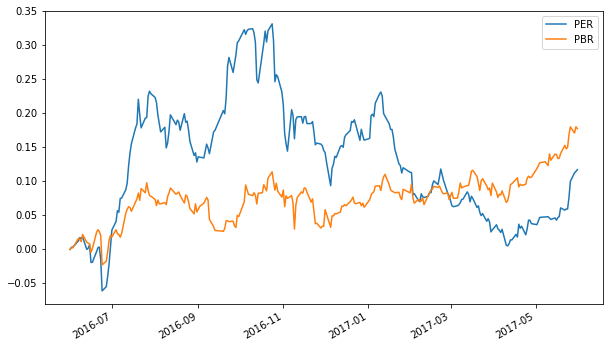

In [63]:
#저PBR, 저PER 전략 비교

low_per=get_value_rank(select_code_by_price(price_df,invest_df,start_date),'PER',strategy_date,20)
low_pbr=get_value_rank(select_code_by_price(price_df,invest_df,start_date),'PBR',strategy_date,20)

per_backtest=backtest_beta(price_df,low_per,start_date,end_date,initial_money)
pbr_backtest=backtest_beta(price_df,low_pbr,start_date,end_date,initial_money)

plt.figure(figsize=(10,6))
per_backtest['총변화율'].plot(label='PER')
pbr_backtest['총변화율'].plot(label='PBR')
plt.legend()
plt.show()

'''
[예시]
* 저PER : 높은 수익률 -> 낮은 수익률
* 저PBR : 꾸준한 상승 -> 1년 뒤 수익률 역전
'''

##PBR 구간별 수익률 비교
* PBR 안에서 수익률 차이 변화 파악 -> 구간별 비교


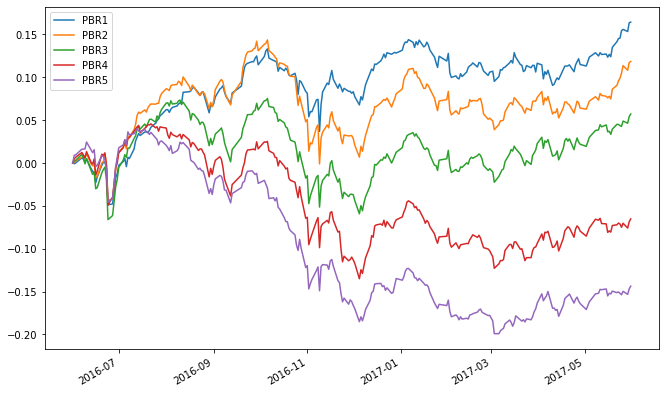

In [72]:
#PBR 구간별 수익률 비교

all_pbr=get_value_rank(select_code_by_price(price_df,invest_df,start_date),'PBR',strategy_date,None).dropna() 
#갯수 옵션 = None -> 정렬된 모든 종목 반환 -> Nan 들어있는 칼럼 삭제

length=int(len(all_pbr)/5) #구간 5개로 나눈 것 

pbr_backtest1=backtest_beta(price_df,all_pbr[:length],start_date,end_date,initial_money)
pbr_backtest2=backtest_beta(price_df,all_pbr[length:length*2],start_date,end_date,initial_money)
pbr_backtest3=backtest_beta(price_df,all_pbr[length*2:length*3],start_date,end_date,initial_money)
pbr_backtest4=backtest_beta(price_df,all_pbr[length*3:length*4],start_date,end_date,initial_money)
pbr_backtest5=backtest_beta(price_df,all_pbr[length*4:],start_date,end_date,initial_money)


plt.figure(figsize=(11,7))
pbr_backtest1['총변화율'].plot(label='PBR1')
pbr_backtest2['총변화율'].plot(label='PBR2')
pbr_backtest3['총변화율'].plot(label='PBR3')
pbr_backtest4['총변화율'].plot(label='PBR4')
pbr_backtest5['총변화율'].plot(label='PBR5')
plt.legend()
plt.show()

'''
[예시]
맹점 : 저PBR로 갈수록 수익률이 높고 고PBR로 갈수록 수익률이 낮은 계단식 그래프이지만 저PBR전략의 우수성으로 단언 어렵
1년 동안인 2016년에만 좋은 전략일 가능성 있음 -> 더 긴 기간의 데이터 사용 필요
'''

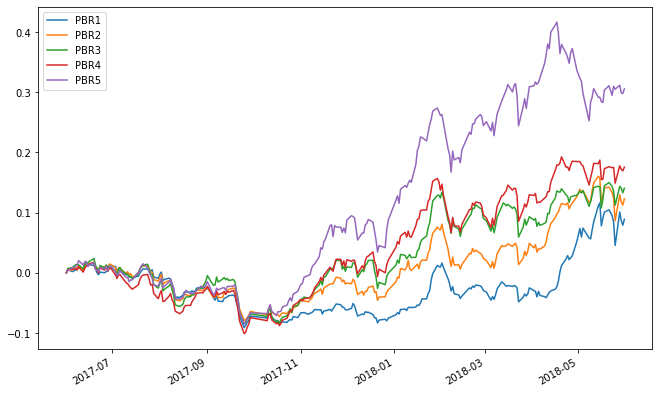

In [74]:
#년도 바꾸기
strategy_date='2016/12'
start_date='2017-6'
end_date='2018-5'
initial_money=100000000


all_pbr=get_value_rank(select_code_by_price(price_df,invest_df,start_date),'PBR',strategy_date,None).dropna()

length=int(len(all_pbr)/5)

pbr_backtest1=backtest_beta(price_df,all_pbr[:length],start_date,end_date,initial_money)
pbr_backtest2=backtest_beta(price_df,all_pbr[length:length*2],start_date,end_date,initial_money)
pbr_backtest3=backtest_beta(price_df,all_pbr[length*2:length*3],start_date,end_date,initial_money)
pbr_backtest4=backtest_beta(price_df,all_pbr[length*3:length*4],start_date,end_date,initial_money)
pbr_backtest5=backtest_beta(price_df,all_pbr[length*4:],start_date,end_date,initial_money)


plt.figure(figsize=(11,7))
pbr_backtest1['총변화율'].plot(label='PBR1')
pbr_backtest2['총변화율'].plot(label='PBR2')
pbr_backtest3['총변화율'].plot(label='PBR3')
pbr_backtest4['총변화율'].plot(label='PBR4')
pbr_backtest5['총변화율'].plot(label='PBR5')
plt.legend()
plt.show()

'''
strategy_date='2015/12'
start_date='2016-6'
end_date='2017-5'
일 때와는 정반대의 결과
-> 얇는 data만 가지고 판단 금지
'''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

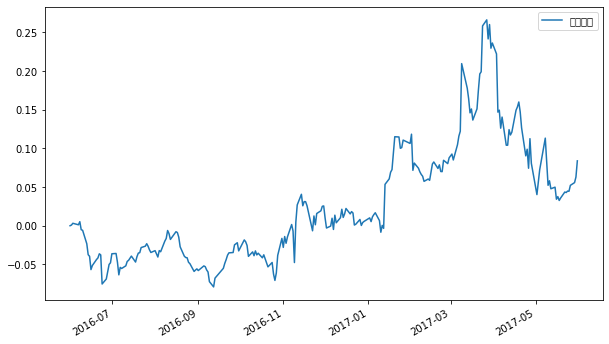

In [79]:
#fscore 백테스트
strategy_date='2015/12'
start_date='2016-6'
end_date='2017-5'
initial_money=100000000

fscore_result=get_fscore(select_code_by_price(price_df,fs_df,start_date),strategy_date,20)

fscore_backtest=backtest_beta(price_df,fscore_result,start_date,end_date,initial_money)

plt.figure(figsize=(10,6))
fscore_backtest['총변화율'].plot()
plt.legend()
plt.show()

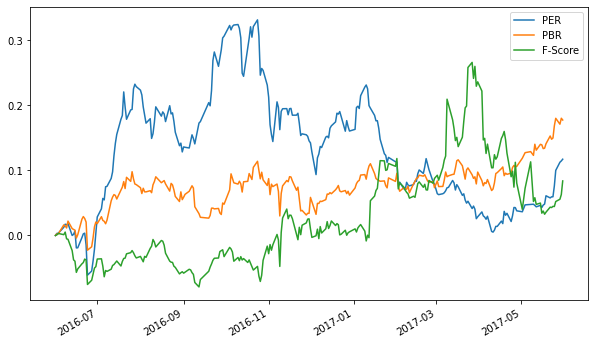

In [80]:
#fscore, 저PER, 저PBR 전략 비교
plt.figure(figsize=(10,6))
per_backtest['총변화율'].plot(label='PER')
pbr_backtest['총변화율'].plot(label='PBR')
fscore_backtest['총변화율'].plot(label='F-Score')
plt.legend()
plt.show()

#**리밸런싱 + 백테스트**
* 기존 백테스트:<br>
주어진 날짜에 전략 수행해 주식 선택 -> 선택된 주식들이 주어진 기간에 어떤 움직임을 보여주는 지 주어진 기간의 가격 데이터를 가져와서 계산 
* 리벨런싱 + 백테스트:<br>
첫번째 리벨런싱 날짜에 전략 수행해 주식들을 선택 -> 선택된 주식들이 첫번째 기간에 어떤 움직임을 보여주는 지 주어진 기간의 가격 데이터를 가져와서 계산 -> 두번째 리밸런싱 날짜에 전략 수행해 주식들 선택 -> 선택된 주식들이 두번째 기간에 전략 수행해 주식들 선택 -> 선택된 주식들이 두번째 기간에 어떤 움직임을 보이는지 주어진 기간의 가격 데이터들을 가져와서 계산 ~~~~> 반복


In [82]:
#백테스트 시작날짜가 주어지면 전략 기준 날짜 계산
def get_strategy_date(start_date):
    temp_year = int(start_date.split('-')[0])
    temp_month = start_date.split('-')[1]
    if temp_month in '1 2 3 4 5'.split(' '):
        strategy_date = str(temp_year - 2) + '/12'
    else:
        strategy_date = str(temp_year - 1) + '/12'
    return strategy_date

In [84]:
#백테스트 with 리벨런싱 진행 파악

start_date = '2016-6' #백테스트 시작 날짜
end_date = '2018-5' # 백테스트 끝나는 날짜 -> 2017-6에 자동 리벨런싱 수행
initial_money = 100000000 #초기 투자금

start_year = int(start_date.split('-')[0])
end_year = int(end_date.split('-')[0])

total_df = 0
for temp in range(start_year, end_year): #시작 날짜와 끝나는 날짜 사이 돌면서
    this_term_start = str(temp) + '-6' #리벨런싱 주기 시작 날짜 -> 첫번째 주기 : 2016-6
    this_term_end = str(temp+1) + '-6' #리벨런싱 주기 끝 날짜 -> 첫번째 주기 : 2017-6

    strategy_date = get_strategy_date(this_term_start)
    low_per = get_value_rank(select_code_by_price(price_df, invest_df, this_term_start), 'PER', strategy_date, 20)
    per_backtest = backtest_beta(price_df, low_per, this_term_start, this_term_end, initial_money) #2017-6 마지막 날까지 백테스트
    temp_end = per_backtest[this_term_end].index[0] #2017-6 첫번째 날 가져오기
    per_backtest = per_backtest[:temp_end] #백테스트 2017-6 첫번째 날까지만 남기고 슬라이싱
    initial_money =  per_backtest['종합포트폴리오'][-1] #종합 포폴의 칼럼 선택 후 마지막 값 가져와 다음 백테스트의 initial_money로 사용 
    if temp == start_year: #첫번째인 경우 이어 붙일 것 없으니 그냥 대입
        total_df = per_backtest
    else:
        total_df = pd.concat([total_df[:-1], per_backtest]) #시간상 앞인 백테스트 결과가 위로 가고 그 다음 백테스트 결과가 아래로 오게 이어 붙임
        
total_df ['일변화율'] = total_df ['종합포트폴리오'].pct_change() #이어 붙인 결과로 일변화율 다시 계산
total_df ['총변화율'] = total_df ['종합포트폴리오']/ total_df ['종합포트폴리오'][0] - 1 #이어 붙인 결과로 총변화율 다시 계산

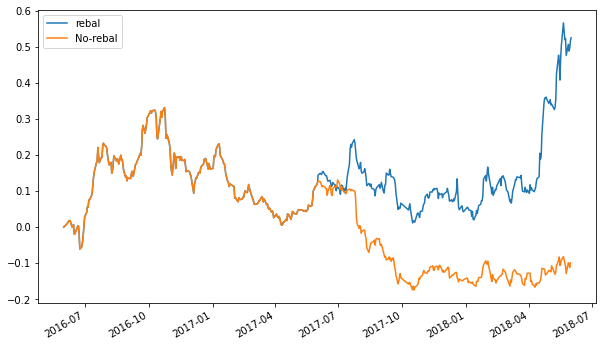

In [87]:
#저PER 전략 리밸러싱 있는 경우와 없는 경우 비교 

low_per = get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PER', get_strategy_date(start_date), 20)
per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)

plt.figure(figsize=(10, 6))
total_df['총변화율'].plot(label='rebal')
per_backtest['총변화율'].plot(label='No-rebal')
plt.legend()
plt.show()

'''
앞의 1년은 그래프 겹쳐 있음 -> 같은 종목으로 포폴 구성했기 때문
1년 뒤부터는 차이 가짐 
-> 리벨런싱으로 다시 저PER 종목을 찾아 포폴 구성 
-> 리벨런싱 없는 경우 그대로 유지

'''

In [90]:
def backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, num, value_type=None, value_list=None, date_range=None):
    
    start_year = int(start_date.split('-')[0])
    end_year = int(end_date.split('-')[0])

    total_df = 0
    for temp in range(start_year, end_year):
        this_term_start = str(temp) + '-' + start_date.split('-')[1]
        this_term_end = str(temp+1) + '-' + start_date.split('-')[1]
        strategy_date = get_strategy_date(this_term_start)
        
        if strategy.__name__ == 'high_roa':
            st_df = strategy(select_code_by_price(price_df, fr_df, this_term_start), strategy_date, num)
        elif strategy.__name__ == 'PER_ROA':
            st_df = strategy(select_code_by_price(price_df, invest_df, this_term_start), strategy_date, num)
        elif strategy.__name__ == 'get_value_rank':
            st_df = strategy(select_code_by_price(price_df, invest_df, this_term_start), value_type, strategy_date, num)
        elif strategy.__name__ == 'make_value_combo':
            st_df = strategy(value_list, select_code_by_price(price_df, invest_df, this_term_start), strategy_date, num)
        elif strategy.__name__ == 'get_fscore':
            st_df = strategy(select_code_by_price(price_df, fs_df, this_term_start), strategy_date, num)
        elif strategy.__name__ == 'get_momentum_rank':
            st_df = strategy(price_df, price_df[this_term_start].index[0] , date_range, num)
        elif strategy.__name__ == 'get_value_quality':
            st_df = strategy(select_code_by_price(price_df, invest_df, this_term_start), 
                             select_code_by_price(price_df, fs_df, this_term_start), strategy_date, num)
        
        backtest = backtest_beta(price_df, st_df, this_term_start, this_term_end, initial_money)
        temp_end = backtest[this_term_end].index[0]
        backtest = backtest[:temp_end]
        initial_money =  backtest['종합포트폴리오'][-1]
        if temp == start_year:
            total_df = backtest
        else:
            total_df = pd.concat([total_df[:-1], backtest])

    total_df ['일변화율'] = total_df ['종합포트폴리오'].pct_change()
    total_df ['총변화율'] = total_df ['종합포트폴리오']/ total_df ['종합포트폴리오'][0] - 1
    
    return total_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

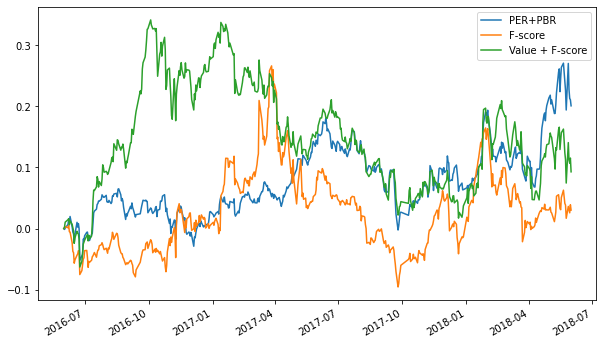

In [91]:
#F-score, PBR+PER, F-score+PBR+PER 전략 비교 
start_date = '2016-6'
end_date = '2018-6'
initial_money = 100000000
strategy1 = make_value_combo
strategy2 = get_fscore
strategy3 = get_value_quality

back_test_result1 = backtest_re(strategy1, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_list=['PER','PBR'])
back_test_result2 = backtest_re(strategy2, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20)
back_test_result3 = backtest_re(strategy3, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20)

plt.figure(figsize=(10, 6))
back_test_result1['총변화율'].plot(label='PER+PBR')
back_test_result2['총변화율'].plot(label='F-score')
back_test_result3['총변화율'].plot(label='Value + F-score')
plt.legend()
plt.show()

#**백테스트 평가 수치 계산**<br>
* CAGR : 연평균 수익률 <br>기간동안 수익률의 기하 평균<br>
(마지막 값/처음 값)^(1/년차)-1<br><br>
* MDD : 최대 낙폭 <br>
 고정점 대비 최대 손실 비율<br>
 포폴의 총변화율의 최대값 - 오늘의 총변화율

In [96]:
#CAGR 구하기
start_date = '2015-6'
end_date = '2018-5'
initial_money = 100000000
strategy = get_value_rank
back_test_result = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PER')

num_of_year = int(end_date.split('-')[0]) - int(start_date.split('-')[0]) #백테스팅 시작과 끝나는 날짜 이용해 백테스트 기간이 몇년인지 계산
CAGR = (back_test_result.iloc[-1]['종합포트폴리오'] / back_test_result.iloc[0]['종합포트폴리오']) ** (1/num_of_year) - 1 #CAGR 계산

In [95]:
#MDD 구하는 함수
def get_mdd(back_test_df): 
    max_list = [0] #각 날짜별로 해당 날짜까지 '총변화율'의 최대값 저장
    mdd_list = [0]

    for i in back_test_df.index[1:]:
        max_list.append(back_test_df['총변화율'][:i].max()) #각 날짜별로 해당 날짜까지 '총변화율'의 최대값 구함
        if max_list[-1] > max_list[-2]: #이전 최대값보다 큰 값이 나오면 0 넣기
            mdd_list.append(0)
        else: #아닌 경우, 지금까지의 최대 하락값 넣기
            mdd_list.append(min(back_test_df['총변화율'][i] - max_list[-1], mdd_list[-1])   )

    back_test_df['max'] = max_list
    back_test_df['MDD'] = mdd_list
    
    return back_test_df

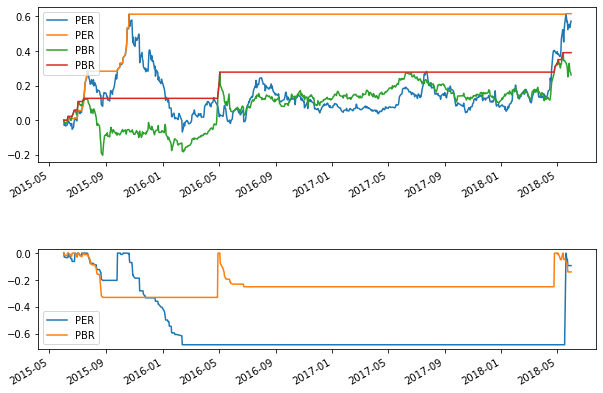

In [97]:
#저PER과 저PBR의 MDD 비교
start_date = '2015-6'
end_date = '2018-5'
initial_money = 100000000
strategy = get_value_rank

back_test_result1 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PER')
back_test_result2 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PBR')

back_test_result1 = get_mdd(back_test_result1)
back_test_result2 = get_mdd(back_test_result2)


plt.figure(figsize=(10, 7))
plt.subplot(2,1,1)
back_test_result1['총변화율'].plot(label='PER')
back_test_result1['max'].plot(label='PER')
back_test_result2['총변화율'].plot(label='PBR')
back_test_result2['max'].plot(label='PBR')
plt.legend()

plt.subplot(3,1,3)
back_test_result1['MDD'].plot(label='PER')
back_test_result2['MDD'].plot(label='PBR')
plt.legend()

'''
위 : 총 변화율과 최대값으로 그린 그래프
아래 : MDD 계산

총변화율만 고려하면 PER 전략이 더 우수하지만 
MDD까지 고려시 PER이 우수하다고 단정하기 어렵
'''